# Exploratory data analysis

Welcome to the fifth week of the course. By the end of this week, you should acquire:

**Knowledge on:**
* Exploratory data analysis methods
* Choosing appropriate visualisations

**Skills on:**
* Conducting exploratory data analysis
* Visualising different types of data

In today's class we will use some packages that your are already familiar with and some new ones that you need to install.

In [ ]:
#install matplotlib seaborn scipy 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data exploration

### General objectives

We will work with a dataset on titles and descriptions of YouTube videos that mention Joe Biden (this data is collected using YouTube API, more on that next week). 

To guide our class, we will pose two research questions that we can answer with the data:
1. To what extent is the sentiment expressed in the title of the video related user engagement (views, likes and dislikes)?</br> *Tip: to create an overall sentiment score, I need at add the negative score to the positive score*
2. To what extent does the sentiment expressed in the title of the video vary depending on whether Joe Biden is mentioned in the video?
3. To what extent the category of the video is related to mentions of Joe Biden in the video?


### Step 1: loading data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_pickle('videos_biden.pkl')

In [ ]:
print("Shape of my data =", df.shape)
print("Variables:", df.columns)  

Shape of my data = (356, 32)
Variables: Index(['channelId', 'channelTitle', 'videoId', 'publishedAt', 'publishedAtSQL',
       'videoTitle', 'videoDescription', 'tags', 'videoCategoryId',
       'videoCategoryLabel', 'duration', 'durationSec', 'dimension',
       'definition', 'caption', 'thumbnail_maxres', 'licensedContent',
       'viewCount', 'likeCount', 'dislikeCount', 'favoriteCount',
       'commentCount', 'dislikeCount_no_na', 'lang_title', 'negative',
       'positive', 'neutral', 'category', 'biden_tag', 'biden_title',
       'biden_description', 'biden_mentioned'],
      dtype='object')


Observation: To answer the RQs I need to look at variables related to sentiment (negative, posiitive), engagement metrics and mentions of Joe Biden. They seem all to be included in the dataset.

In [ ]:
df.dtypes

channelId                          object
channelTitle                       object
videoId                            object
publishedAt           datetime64[ns, UTC]
publishedAtSQL                     object
videoTitle                         object
videoDescription                   object
tags                               object
videoCategoryId                     int64
videoCategoryLabel                 object
duration                           object
durationSec                         int64
dimension                          object
definition                         object
caption                              bool
thumbnail_maxres                   object
licensedContent                   float64
viewCount                         float64
likeCount                         float64
dislikeCount                      float64
favoriteCount                       int64
commentCount                      float64
dislikeCount_no_na                float64
lang_title                        

In [ ]:
df.head()

channelId                    channelTitle      videoId  \
0  UC18vz5hUUqxbGvym9ghtX_w  Full Frontal with Samantha Bee  xkgt1Avnvw0   
1  UCJ6DCjlsOB8dwCrDbOLia6g                      Info Viral  Sf-klthGrqA   
2  UC18vz5hUUqxbGvym9ghtX_w  Full Frontal with Samantha Bee  4Z0O1lJBU7g   
3  UCEfvFsy9qbzeKyASsDs0V-w                        KJ Singh  KWoI9jTHHlk   
4  UC7pluR6rB5KZIbN2IxamzxQ                BBC News Marathi  32y2dG2tLOg   

                publishedAt       publishedAtSQL  \
0 2021-09-16 05:59:45+00:00  2021-09-16 05:59:45   
1 2021-09-16 06:00:06+00:00  2021-09-16 06:00:06   
2 2021-09-16 05:59:46+00:00  2021-09-16 05:59:46   
3 2021-09-16 05:38:04+00:00  2021-09-16 05:38:04   
4 2021-09-16 04:58:32+00:00  2021-09-16 04:58:32   

                                          videoTitle  \
0  Vivian Howard: The Perfect Recipe for Combatin...   
1  Global climate change!Cameroon under the snow,...   
2  Food Waste and Climate Change: How Your Leftov...   
3  Climate Change in Australia and Brexit #downun...   
4  Climate Change : 50c सेल्शिअस तापमानाच्या ठिका...   

                                    videoDescription  \
0  Apocalyptic climate crisis got you down? Allow...   
1  #GlobalClimateChange #CameroonUnderTheSnow #Sn...   
2  The recent devastating climate report left man...   
3                                                NaN   
4  #ClimateChange #Temperature #Heat नायजेरिया दे...   

                                                tags  videoCategoryId  \
0  Full Frontal with Samantha Bee,Full Frontal,Sa...               24   
1  snow,snow fall,snow falling,snow fall in Camer...               26   
2  Full Frontal with Samantha Bee,Full Frontal,Sa...               24   
3                                                NaN               22   
4  Global Warming,Warming,Hottest place in world,...               25   

  videoCategoryLabel  ... dislikeCount_no_na  lang_title negative positive  \
0      Entertainment  ...                2.0          en       -1        1   
1      Howto & Style  ...                0.0          en       -1        2   
2      Entertainment  ...                5.0          en       -1        1   
3     People & Blogs  ...                0.0          en       -1        1   
4    News & Politics  ...                3.0          mr       -1        1   

   neutral         category  biden_tag  biden_title  biden_description  \
0        0            Other          0            0                  0   
1        1            Other          0            0                  0   
2        0            Other          0            0                  0   
3        0            Other          0            0                  0   
4        0  News & Politics          0            0                  0   

   biden_mentioned  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 32 columns]

In [ ]:
df.isna().sum()

channelId              0
channelTitle           0
videoId                0
publishedAt            0
publishedAtSQL         0
videoTitle             0
videoDescription      12
tags                  41
videoCategoryId        0
videoCategoryLabel     0
duration               0
durationSec            0
dimension              0
definition             0
caption                0
thumbnail_maxres      89
licensedContent       78
viewCount              0
likeCount              0
dislikeCount           0
favoriteCount          0
commentCount          30
dislikeCount_no_na     0
lang_title             0
negative               0
positive               0
neutral                0
category               0
biden_tag              0
biden_title            0
biden_description      0
biden_mentioned        0
dtype: int64

Observations: I am interested in commentCount that seems to have missing valuse. I need to take care of it.

Observation: from the variables I am interested in, all variables are nummerig except for sentiment, which is string.

### Step 2: Data cleaning and preparation

Based on loading and first exploration I know I need to:
1. Fix data types for sentiment and prepare sentiment score.
2. Deal with missing values in comment count.

In [ ]:
df['positive'] = df['positive'].apply(pd.to_numeric)

In [ ]:
df['negative'] = df['negative'].apply(pd.to_numeric)

In [ ]:
df['sentiment'] = df['positive'] + df['negative']

In [12]:
df['sentiment'].describe()

count    356.000000
mean      -0.353933
std        0.861385
min       -4.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: sentiment, dtype: float64

In [78]:
df['commentCount'].describe()

count      326.000000
mean      1139.003067
std       4636.133969
min          0.000000
25%         24.000000
50%        142.000000
75%        635.500000
max      68194.000000
Name: commentCount, dtype: float64

In [79]:
#dropping rows with NA's in column 'commentCount'
df.dropna(subset=['commentCount'], inplace=True)

In [80]:
df.shape

(326, 33)

### Data exploration

In [16]:
#Exploring continous data
df.describe().transpose()

count           mean            std   min      25%  \
videoCategoryId     356.0      24.938202       2.887877   1.0    25.00   
durationSec         356.0     647.994382     710.124639  15.0   218.00   
licensedContent     278.0       1.000000       0.000000   1.0     1.00   
viewCount           356.0  181912.575843  718361.132334   0.0  2245.25   
likeCount           356.0    4477.382022   19526.898077   0.0    54.75   
dislikeCount        356.0     429.387640    2666.916788   0.0     8.00   
favoriteCount       356.0       0.000000       0.000000   0.0     0.00   
commentCount        326.0    1139.003067    4636.133969   0.0    24.00   
dislikeCount_no_na  356.0     429.387640    2666.916788   0.0     8.00   
negative            356.0      -1.426966       0.820685  -5.0    -2.00   
positive            356.0       1.073034       0.300709   1.0     1.00   
biden_tag           356.0       0.103933       0.305603   0.0     0.00   
biden_title         356.0       0.058989       0.235935   0.0     0.00   
biden_description   356.0       0.095506       0.294326   0.0     0.00   
biden_mentioned     356.0       0.134831       0.342024   0.0     0.00   

                        50%       75%        max  
videoCategoryId        25.0     25.00       29.0  
durationSec           408.0    763.75     3585.0  
licensedContent         1.0      1.00        1.0  
viewCount           15707.0  81258.00  7435424.0  
likeCount             262.0   1638.50   267054.0  
dislikeCount           51.0    165.00    45290.0  
favoriteCount           0.0      0.00        0.0  
commentCount          142.0    635.50    68194.0  
dislikeCount_no_na     51.0    165.00    45290.0  
negative               -1.0     -1.00       -1.0  
positive                1.0      1.00        3.0  
biden_tag               0.0      0.00        1.0  
biden_title             0.0      0.00        1.0  
biden_description       0.0      0.00        1.0  
biden_mentioned         0.0      0.00        1.0

In [17]:
df['negative'].describe()

count    356.000000
mean      -1.426966
std        0.820685
min       -5.000000
25%       -2.000000
50%       -1.000000
75%       -1.000000
max       -1.000000
Name: negative, dtype: float64

Looking at frequencies for categorical data

In [19]:
df['category'].value_counts(normalize=True)

News & Politics                      0.592697
Other                                0.191011
Education, Science and Technology    0.174157
Nonprofits & Activism                0.042135
Name: category, dtype: float64

Exploring relations between variables

In [24]:
import numpy as np
#grouping by category and getting mean and standard deviation of negative per category
df.groupby('category')['negative'].agg([np.mean, np.std]).transpose()

category  Education, Science and Technology  News & Politics  \
mean                              -1.241935        -1.492891   
std                                0.644917         0.863932   

category  Nonprofits & Activism     Other  
mean                  -1.866667 -1.294118  
std                    0.990430  0.734213

In [25]:
#grouping by category and getting descriptives of negative per category
df.groupby('category')['negative'].describe()

count      mean       std  min  25%  50%  \
category                                                                      
Education, Science and Technology   62.0 -1.241935  0.644917 -4.0 -1.0 -1.0   
News & Politics                    211.0 -1.492891  0.863932 -5.0 -2.0 -1.0   
Nonprofits & Activism               15.0 -1.866667  0.990430 -3.0 -3.0 -1.0   
Other                               68.0 -1.294118  0.734213 -4.0 -1.0 -1.0   

                                   75%  max  
category                                     
Education, Science and Technology -1.0 -1.0  
News & Politics                   -1.0 -1.0  
Nonprofits & Activism             -1.0 -1.0  
Other                             -1.0 -1.0

In [28]:
#number of cases per category of biden mention
df['biden_mentioned'].value_counts()

0    308
1     48
Name: biden_mentioned, dtype: int64

In [29]:
#number of cases per category
df['category'].value_counts()

News & Politics                      211
Other                                 68
Education, Science and Technology     62
Nonprofits & Activism                 15
Name: category, dtype: int64

In [27]:
print("Mean sentiment depending on mention of biden and category")
df.groupby(['biden_mentioned', 'category'])['negative'].mean()

Mean sentiment depending on mention of biden and category


biden_mentioned  category                         
0                Education, Science and Technology   -1.241935
                 News & Politics                     -1.524096
                 Nonprofits & Activism               -1.866667
                 Other                               -1.307692
1                News & Politics                     -1.377778
                 Other                               -1.000000
Name: negative, dtype: float64

In [31]:
print("Crosstab biden mentioned and video category")
print(pd.crosstab(df["biden_mentioned"], 
                  df["category"]))

Crosstab biden mentioned and video category
category         Education, Science and Technology  News & Politics  \
biden_mentioned                                                       
0                                               62              166   
1                                                0               45   

category         Nonprofits & Activism  Other  
biden_mentioned                                
0                                   15     65  
1                                    0      3  


### Step 3: Data visualization

## Visualization

#### Introduction to matplotlib

The general idea with matplotlib is to create an empty figure, and then add elements (axes, labels, titles, ...) to it, and then either save or show the image.

This is especially useful if your data are not in a pandas dataframe, but, for instance, in some lists.

There are multiple ways of plotting things with matplotlib, but the most common one is probably to just plot lists of values:


Text(0.5, 0, 'x lable')

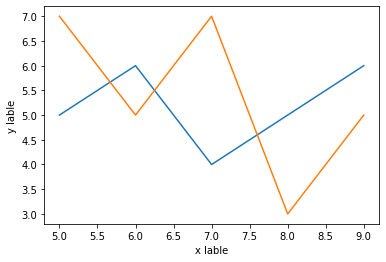

In [33]:
#line by line plotting

list1 = [5,6,7,8,9]
list2 = [5,6,4,5,6]
list3 = [7,5,7,3,5]


plt.plot(list1,list2)
plt.plot(list1,list3)
plt.ylabel("y lable")
plt.xlabel("x lable")

However, you get more **control** and make your plot **scalable** if you use an object-oriented approach and create a figure and an axis object first:

In [ ]:
# filling an object

# Create a figure and a so-called axis within it
fig, ax = plt.subplots() # <---- different

ax.set_ylabel("y lable")
ax.set_xlabel("x lable")
ax.plot(list1,list2)
ax.plot(list1,list3)

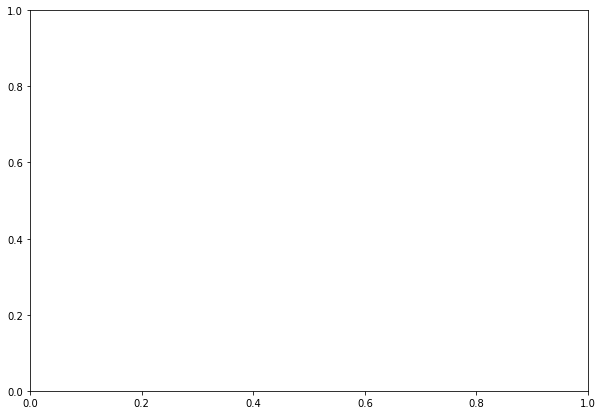

In [34]:
# Create a figure and a so-called axis within it
empty_fix, axes = plt.subplots(figsize=(10,7))

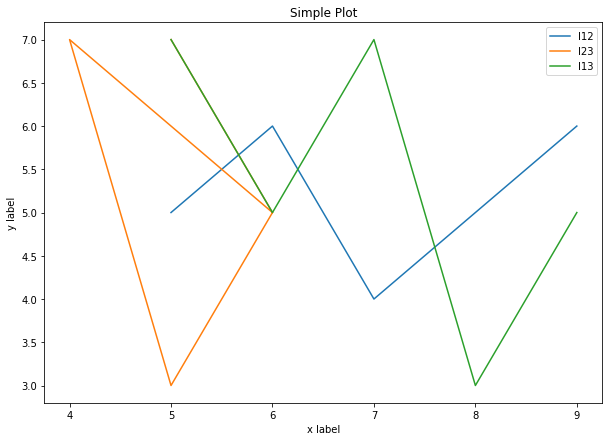

In [35]:
# Create a figure and a so-called axis within it
empty_fix, axes = plt.subplots(figsize=(10,7))

# let's generate some sample data
# plot some function
axes.plot(list1,list2, label='l12')
axes.plot(list2,list3, label='l23')
axes.plot(list1,list3, label='l13')

# add labels, titles, legends, ...
axes.set_xlabel('x label')
axes.set_ylabel('y label')
axes.set_title("Simple Plot")
axes.legend()

# Save and/or show the figure. Use ? to get different options for file formats etc
#fig.savefig('test.png',dpi=300)

#### Matplotlib x Pandas

The most useful way for you in this class to interact with matplotlib, however, is via pandas. Pandas dataframes have build-in methods that call matplotlib 'under the hood', which makes it very easy for you to use.

You essentially just add `.plot()` to a table-like object, and it will produce a plot. With the `kind` argument, you can specify which type of plot you want (pie, bar, line, etc)

The nice thing is that you still can use the native matplotlib functions presented above, for instance plt.savefig() if you want to save the figures.

<AxesSubplot:ylabel='Frequency'>

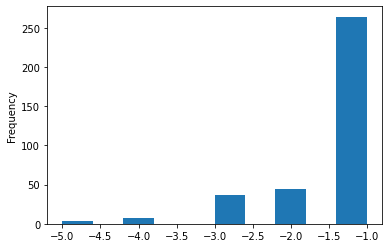

In [37]:
df['negative'].plot.hist()

<AxesSubplot:>

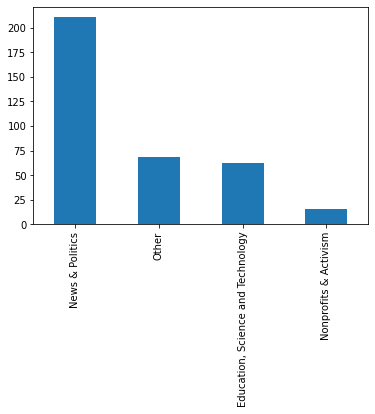

In [38]:
df['category'].value_counts().plot.bar()

<AxesSubplot:xlabel='publishedAt'>

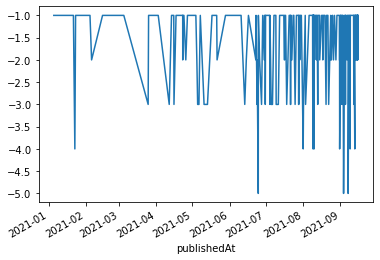

In [41]:
df.groupby(["publishedAt"])["negative"].mean().plot()

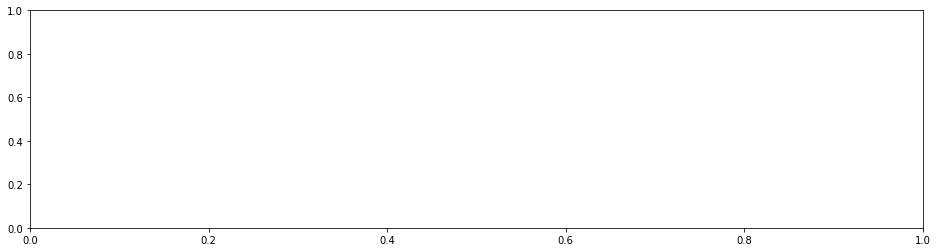

In [42]:
#creating an empty figure
fig, ax = plt.subplots(figsize=(16,4))

<AxesSubplot:xlabel='publishedAt'>

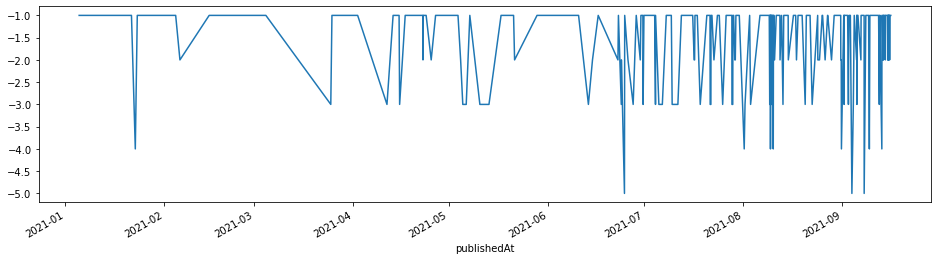

In [45]:
#creating an empty figure and filling it with the plot
fig, ax = plt.subplots(figsize=(16,4))
df.groupby(["publishedAt"])["negative"].mean().plot(ax=ax)

#### Seaborn

Seaborn is built on matplotlib, but uses a different grammar. You may find it, in fact, more intuitive, as you basically provide each seaborn function with a couple of arguments (see slides).

When using seaborn, we do not use the method `.plot` of a pandas object (as with matplotlib), but call the seaborn function directly and pass on the dataframe with the `data = ...` argument

In [46]:
df.columns

Index(['channelId', 'channelTitle', 'videoId', 'publishedAt', 'publishedAtSQL',
       'videoTitle', 'videoDescription', 'tags', 'videoCategoryId',
       'videoCategoryLabel', 'duration', 'durationSec', 'dimension',
       'definition', 'caption', 'thumbnail_maxres', 'licensedContent',
       'viewCount', 'likeCount', 'dislikeCount', 'favoriteCount',
       'commentCount', 'dislikeCount_no_na', 'lang_title', 'negative',
       'positive', 'neutral', 'category', 'biden_tag', 'biden_title',
       'biden_description', 'biden_mentioned'],
      dtype='object')

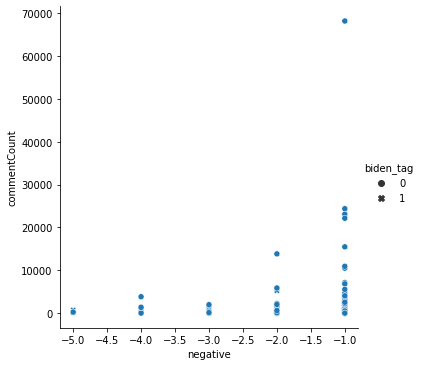

In [49]:
sns.relplot(x="negative", y="commentCount",  style='biden_tag', data=df)

### Basic chart types and how to make them

### Univariate visualisations

#### Bar charts

* counts per (discrete) category

<AxesSubplot:>

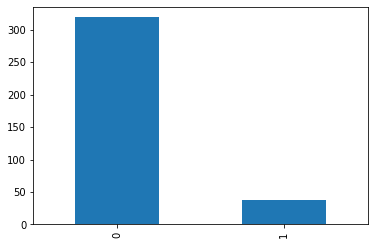

In [50]:
# with matplotlib
df['biden_tag'].value_counts(sort=False).plot(kind='bar')

<AxesSubplot:xlabel='biden_tag', ylabel='count'>

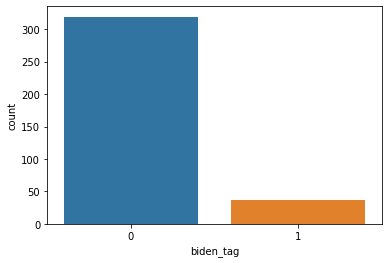

In [51]:
# with seaborn
sns.countplot(x = 'biden_tag', data=df)

#### Histagram

* distribution of a variable

<AxesSubplot:ylabel='Frequency'>

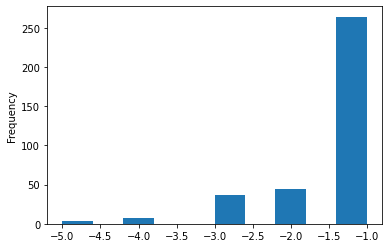

In [54]:
#with matplotlib
df['negative'].plot.hist()

<AxesSubplot:xlabel='negative', ylabel='Count'>

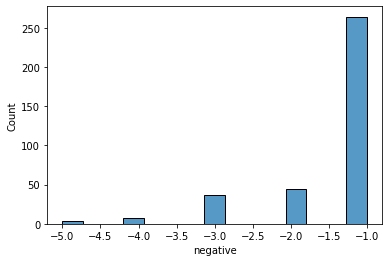

In [55]:
#with seaborn
sns.histplot(data=df, x='negative')

<AxesSubplot:xlabel='viewCount', ylabel='Count'>

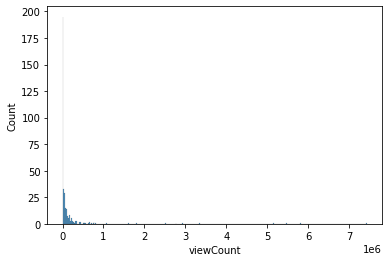

In [57]:
#with seaborn
sns.histplot(data=df, x='viewCount')

<AxesSubplot:xlabel='viewCount', ylabel='Count'>

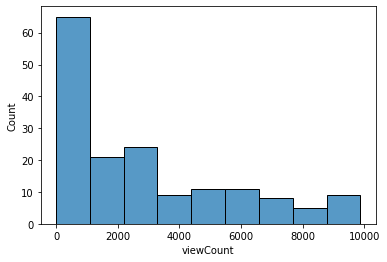

In [58]:
#with seaborn and filtering the dataframe
sns.histplot(data=df[(df["viewCount"] < 10000)], x='viewCount')

### Bivariate visualisations

#### Bar charts

*  statistical property (e..g, mean) per (discrete) category
* different variations (e.g., stacked bar charts)

<AxesSubplot:xlabel='biden_tag', ylabel='negative'>

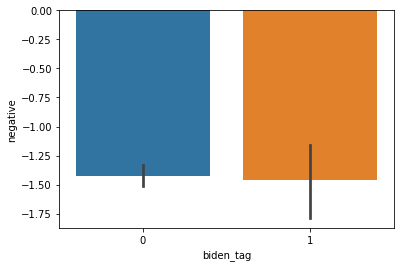

In [59]:
#with seaborn
sns.barplot(x="biden_tag", y="negative", data=df, ci=95)

<AxesSubplot:xlabel='biden_tag', ylabel='positive'>

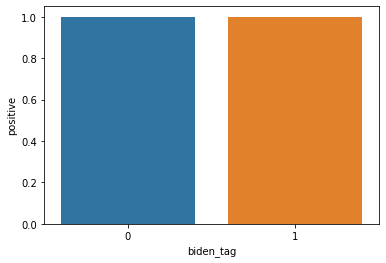

In [60]:
#with seaborn
sns.barplot(data=df, x='biden_tag', y = 'positive', estimator=np.median, ci=None)

<AxesSubplot:xlabel='biden_tag', ylabel='negative'>

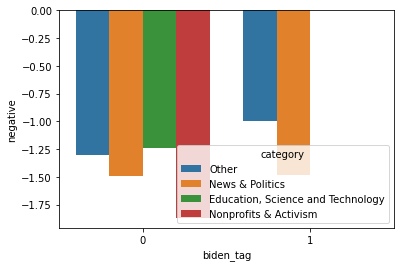

In [62]:
#with seaborn
sns.barplot(x="biden_tag", y="negative",  hue="category",  data=df, ci=None)

#### Line plots

* ordered (and typically evenly spaced) values on x-axis
* x-axis has many (in theory: contious) measurements
* typical use case: plot some value(s) over time

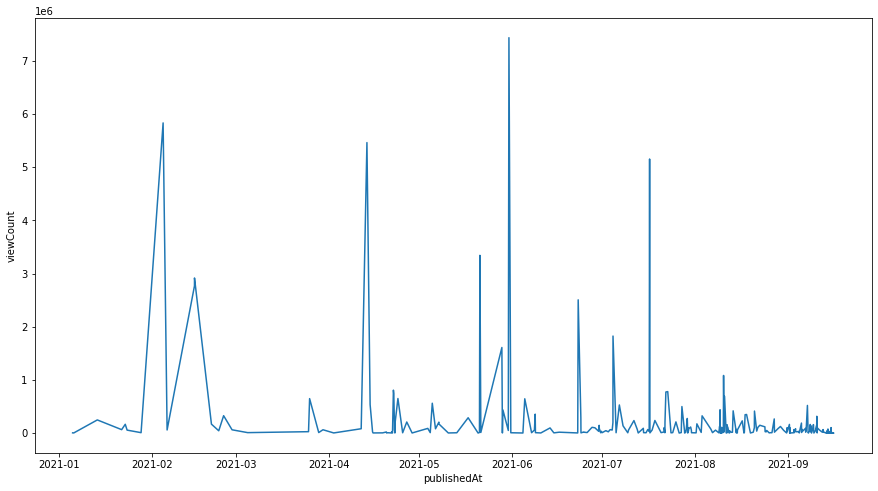

In [65]:
#Creating an empty figure 
plt.figure(figsize = (15,8))
#Filling it with seaborn chart
ax = sns.lineplot(x='publishedAt', y='viewCount', data=df)

<AxesSubplot:xlabel='publishedAt', ylabel='viewCount'>

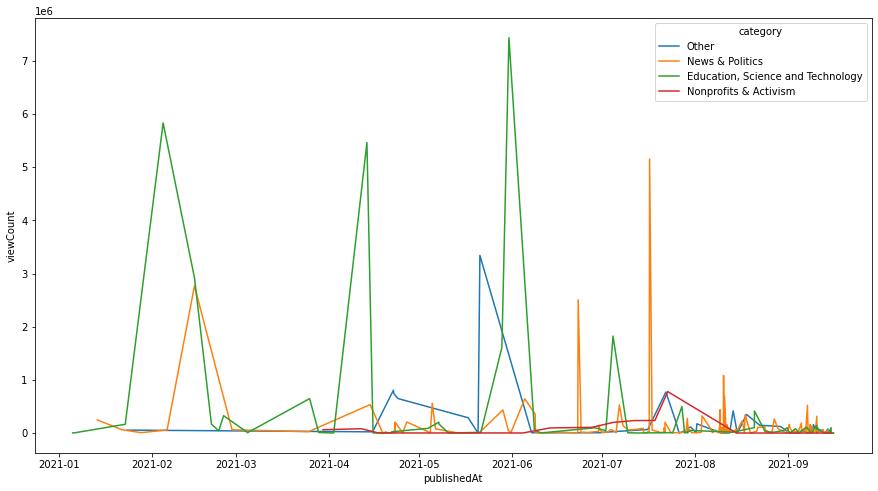

In [66]:
#Creating an empty figure 
plt.figure(figsize = (15,8))
#Filling it with seaborn chart
sns.lineplot(x='publishedAt', y='viewCount', hue='category', data=df)

#### Regplot/relplot

* For visualising relation between two continous variables 

<AxesSubplot:xlabel='negative', ylabel='viewCount'>

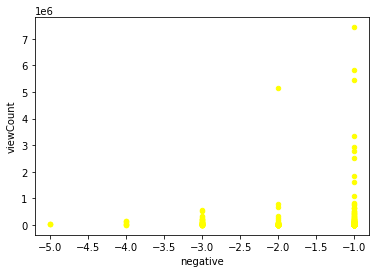

In [68]:
#using matplotlib
df.plot.scatter(x='negative', y='viewCount', c='yellow')

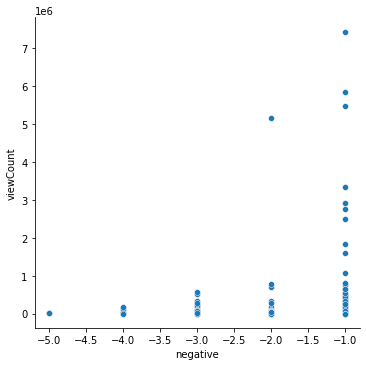

In [69]:
#using seaborn
sns.relplot(x='negative', y='viewCount', data=df)

<AxesSubplot:xlabel='negative', ylabel='viewCount'>

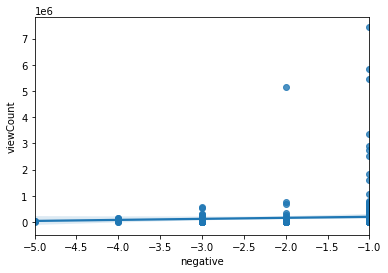

In [70]:
#using seaborn
sns.regplot(x='negative', y='viewCount', data=df)

In [ ]:
#using seaborn
sns.relplot(x="sentiment", y="viewCount", col="biden_mentioned",
            hue="category",
            data=df);

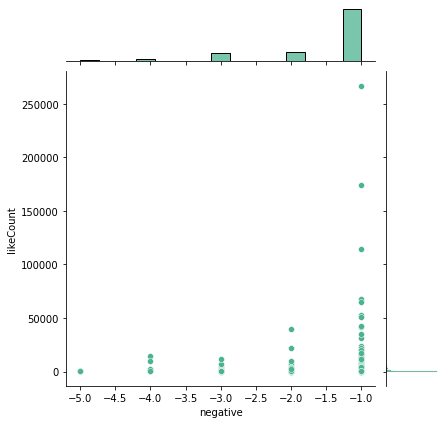

In [71]:
# We could also add histograms to the sides
sns.jointplot(data = df, x = 'negative', y='likeCount', 
              kind="scatter", color="#4CB391")

In [ ]:
# ... or replace the scatterplot by a hexplot in which overlapping points lead to a darker shade
sns.jointplot(data = df, x = 'sentiment', y='likeCount', 
              kind="hex", color="#4CB391")

## Statistics in Python

### Short intro to NumPy

In [13]:
import numpy as np

In [14]:
numbers = [6,7,4,6,7]
print(np.mean(numbers), ', ', np.std(numbers))

6.0 ,  1.0954451150103321


In [15]:
x = [88,66,4,7]
y = [5,57,22,6]
np.corrcoef([x,y])

array([[1.        , 0.20120819],
       [0.20120819, 1.        ]])

### Correlation (Pearson's r)

In [72]:
df['negative'].corr(df['likeCount'])

0.06401092105870126

In [74]:
from scipy.stats import pearsonr

pearsonr(df['negative'], df['likeCount'])

(0.06401092105870125, 0.22830218044427172)

### Independent sample t-tests

In [16]:
import scipy.stats as stats


stats.ttest_ind(df['likeCount'][df['biden_mentioned'] == 0],
                df['likeCount'][df['biden_mentioned'] == 1])

Ttest_indResult(statistic=1.1533105982149103, pvalue=0.24956103088492634)

### Bonus: assumption checking

In [ ]:
#Levene's test
stats.levene(df['likeCount'][df['biden_mentioned'] == 0],
             df['likeCount'][df['biden_mentioned'] == 1],
             center= 'mean')